# Regression Challenge

Hello and welcome to my submission for the Regression Data Science challenge. Thank you for the opportunity to do this challenge and submit my work for you to consider. I selected this challenge so that I could walk through a typical model building approach, from data understanding, EDA, and model building. I thought it would be enlightening to share my thoughts along the way and show how I would approach a problem like this. 

I have added commentary throughout that helps you to understand my thinking, the things I notice or have questions about, and my overall thought process. I would love the chance to answer any questions you may have and to hear any comments or feedback about anything in this project. This was a very interesting and exciting project to go through and I hope you enjoy following along with me through the journey!

# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from google.colab import files
uploaded = files.upload()

Saving challenge1.csv to challenge1 (1).csv


In [7]:
import io
price_ds = pd.read_csv(io.BytesIO(uploaded['challenge1.csv']))
#price_ds = pd.read_csv("challenge1.csv")

My first step after having imported the data is to check it out. Look at what is contained in the dataset and do some EDA.

In [8]:
price_ds.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


In [9]:
price_ds.describe()

,para1,para2,para3,para4,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.380800,447.384000,9547.989920,8.459522,433.733056
std,3.500831,221.005861,8022.814037,4.613526,277.435947
min,0.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,301.000000,2898.000000,4.000000,250.000000
50%,1.000000,434.000000,6447.000000,7.200000,370.000000
75%,1.000000,582.000000,15000.000000,13.600000,550.000000
max,337.000000,2554.000000,34782.000000,27.200000,5700.000000


In [10]:
price_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    10000 non-null  object 
 1   loc2    10000 non-null  object 
 2   para1   10000 non-null  int64  
 3   dow     10000 non-null  object 
 4   para2   10000 non-null  int64  
 5   para3   10000 non-null  float64
 6   para4   10000 non-null  float64
 7   price   10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


Looks like the data available are 2 generic location columns, a day of the week column, and 4 parameters. I dont know what the paramters are but we can still use them. Lets do some EDA.

# Exploratory Data Analysis

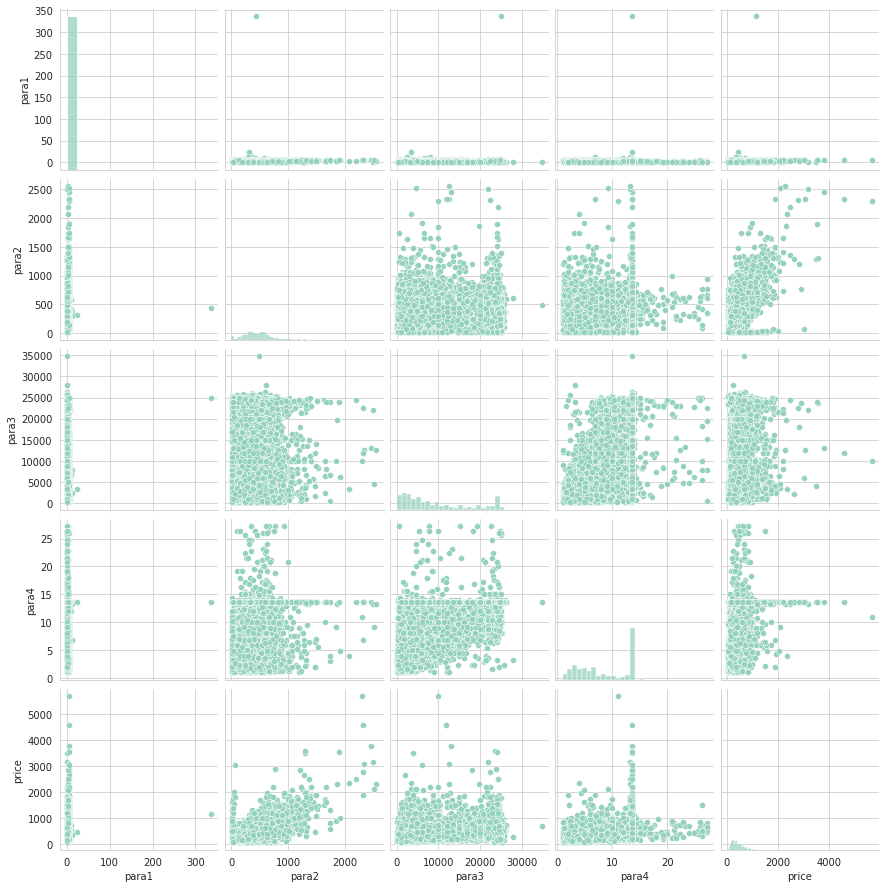

In [11]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.pairplot(price_ds)

What do I notice in the above? 

**I notice that:** \
-para1 has 1 major outlier that is messing up the data. I will most likely remove this outlier from the analysis. \
-para2 seems pretty normal but skewed towards low values. \
-para 2 is also showing a decent relationship to price.\
-para3 is somewhat bimodal and not showing any great relationships to other values\
-same with para4. Not a great relationship with any of them.\
-price appears to be somewhat normal until the prices get very high. Dont necessarily want to limit the analysis but that skewness could effect the analysis.\
-price seems to be most correlated with para2\
-could be a combination of parameters is the key. Could explore creating new features using some simple transformations of the data.

**Questions to ask:**\
-how correlated are the variables actually?\
-Are there any ways to combine the data into new features?\
-How does location or dow affect the data relationships?


Because of point 1 above I will exclude the 1 outlier in para1 to help with model.

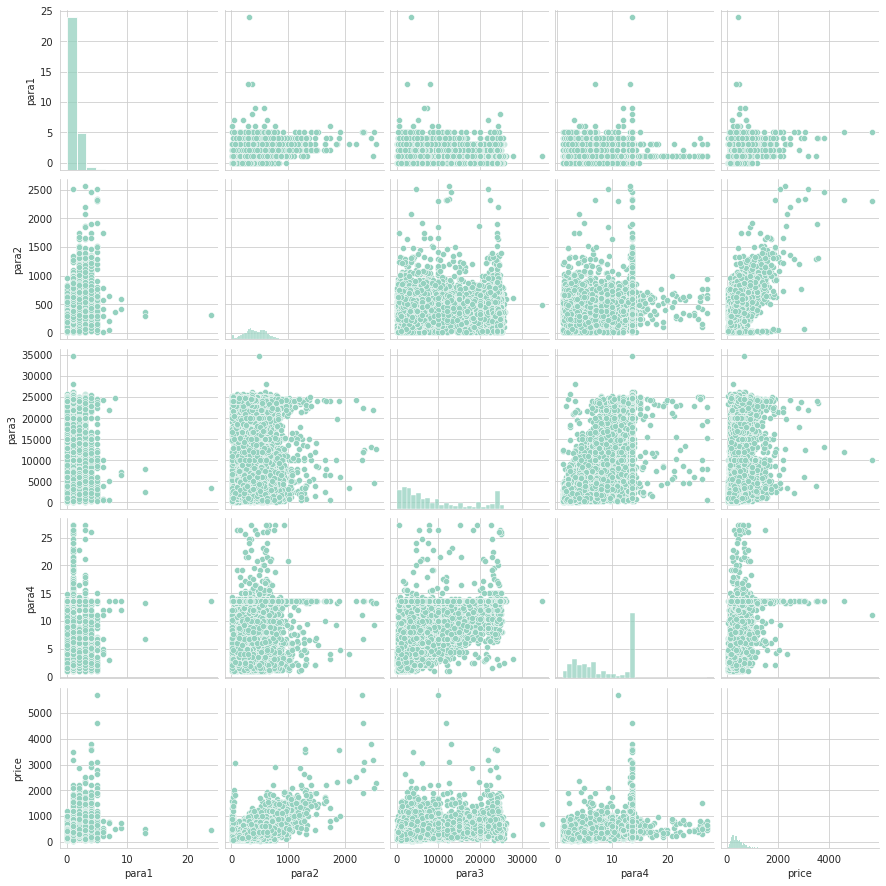

In [12]:
price_ds_2 = price_ds[price_ds['para1']<300]

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.pairplot(price_ds_2)

This seemed to help but now para1 isnt showing major relationships to any of them.

Try creating new parameters first. Since I dont know what the parameters are I cant use any sort of domain knowledge to combine them intelligently. What I can do is just see if they have any basic relationships with multiplied and divided by each other. 

In [13]:
price_ds['para1x2']=(price_ds['para1'] * price_ds['para2'])
price_ds['para1x3']=(price_ds['para1'] * price_ds['para3'])
price_ds['para1x4']=(price_ds['para1'] * price_ds['para4'])
price_ds['para2x3']=(price_ds['para2'] * price_ds['para3'])
price_ds['para2x4']=(price_ds['para2'] * price_ds['para4'])
price_ds['para3x4']=(price_ds['para3'] * price_ds['para4'])

price_ds['para1/2']=(price_ds['para1'] / price_ds['para2'])
price_ds['para1/3']=(price_ds['para1'] / price_ds['para3'])
price_ds['para1/4']=(price_ds['para1'] / price_ds['para4'])
price_ds['para2/1']=(price_ds['para2'] / price_ds['para1'])
price_ds['para2/3']=(price_ds['para2'] / price_ds['para3'])
price_ds['para2/4']=(price_ds['para2'] / price_ds['para4'])
price_ds['para3/1']=(price_ds['para3'] / price_ds['para1'])
price_ds['para3/2']=(price_ds['para3'] / price_ds['para2'])
price_ds['para3/4']=(price_ds['para3'] / price_ds['para4'])
price_ds['para4/1']=(price_ds['para4'] / price_ds['para1'])
price_ds['para4/2']=(price_ds['para4'] / price_ds['para2'])
price_ds['para4/3']=(price_ds['para4'] / price_ds['para3'])

In [14]:
price_ds_2 = price_ds[price_ds['para1']<300]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


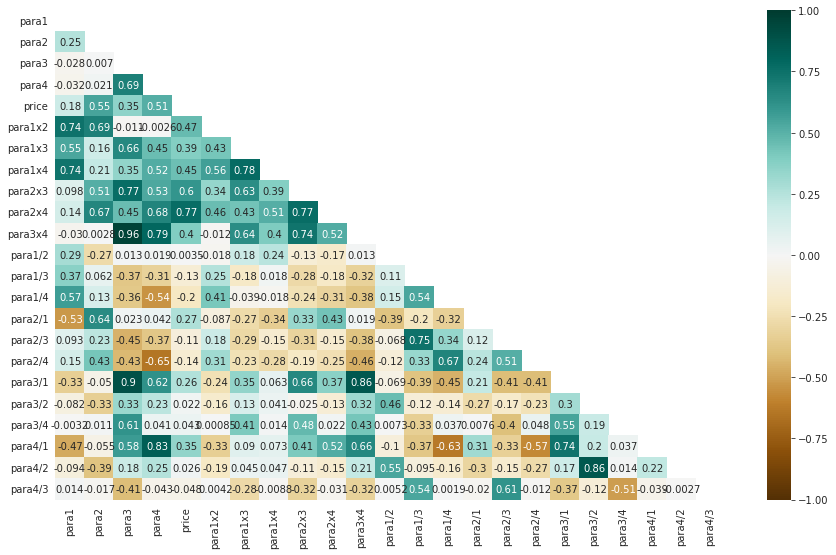

In [15]:
plt.figure(figsize=(15,9))
mask = np.triu(np.ones_like(price_ds_2.corr(), dtype=np.bool))
heatmap = sns.heatmap(price_ds_2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

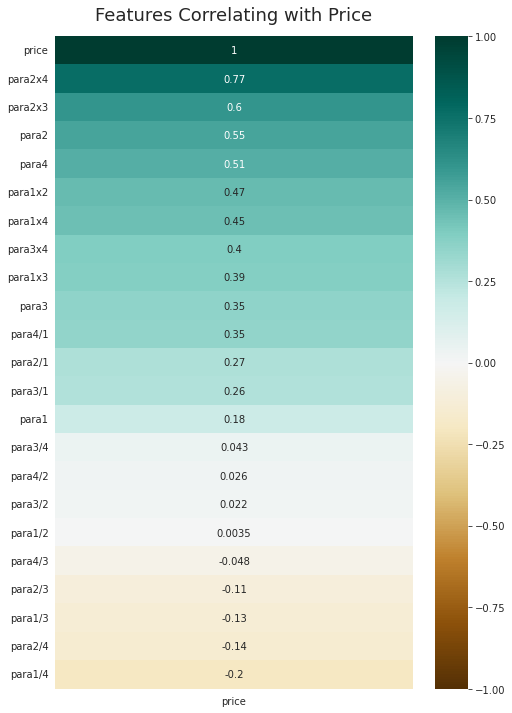

In [16]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(price_ds_2.corr()[['price']].sort_values(by='price', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

It appears that price is most correlated to 2x4, 2x3, 2, 4, etc.. this is unsurprising as para 2 was the most correlated originally. The divisors arent super helpful though. Lets view these first few relationships together.

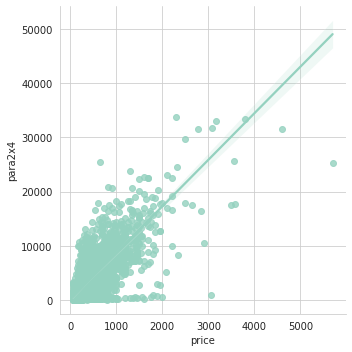

In [17]:
sns.lmplot(x='price',y='para2x4',data=price_ds_2)

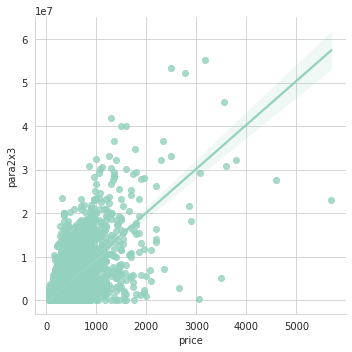

In [18]:
sns.lmplot(x='price',y='para2x3',data=price_ds_2)

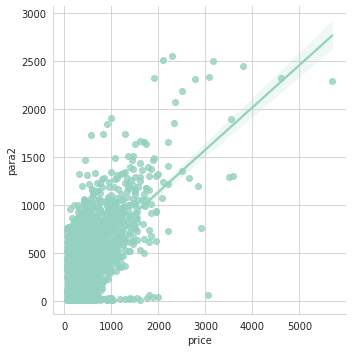

In [19]:
sns.lmplot(x='price',y='para2',data=price_ds_2)

We have created some new features that might prove to be helpful. I havent touched anything having to do with day of the week or location. Lets look at some of those trends and see what we can find. 

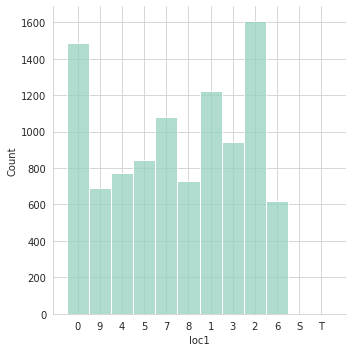

In [20]:
sns.displot(price_ds['loc1'])

Appears we have pretty good coverage across the specturm of locations. Not sure what location S and T are, but it appears we dont have any/very many of those. Lets look at price comparison between them.

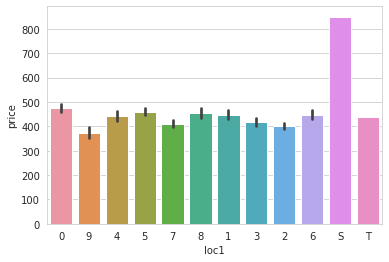

In [21]:
sns.barplot(x="loc1", y="price", data=price_ds_2)

Not a huge difference between locations. S is the only outlier there. How many of those do we actually have?

In [22]:
price_ds_2[price_ds_2['loc1']=="S"]['loc1'].count()

1

Only 1. Lets exclude it since it will skew the data and wont help us to make an informed decision if we have another "S" location asset.

In [23]:
price_ds_2=price_ds_2[price_ds_2['loc1']!="S"]

price_ds_2[price_ds_2['loc1']=="T"]['loc1'].count()

1

Only 1 "T" as well... goodbye to it as well!

In [24]:
price_ds_2=price_ds_2[price_ds_2['loc1']!="T"]

price_ds_2[price_ds_2['loc1']=="T"]['loc1'].count()

0

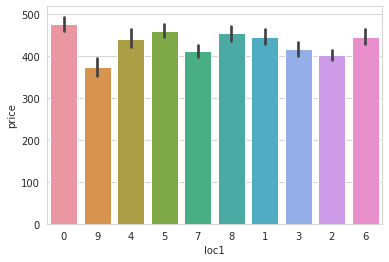

In [25]:
sns.barplot(x="loc1", y="price", data=price_ds_2)

The loc2 parameter might end up giving too small sample sizes for us to work with and might overfit out model to a specific loc 2. Lets check a few and see how small our samples get.

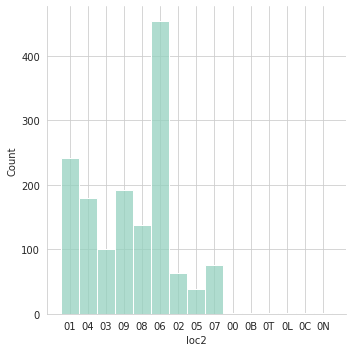

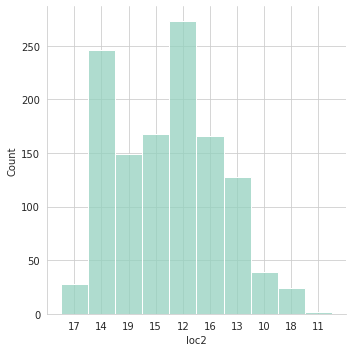

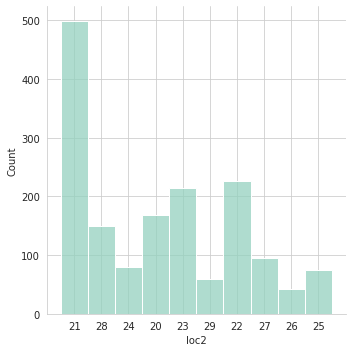

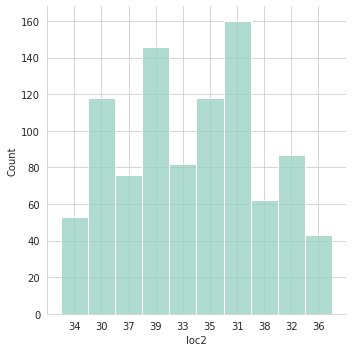

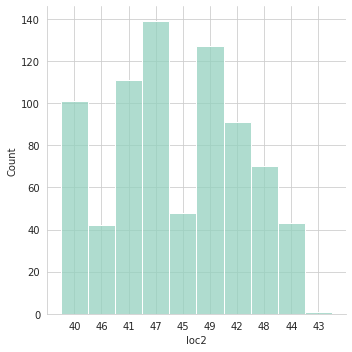

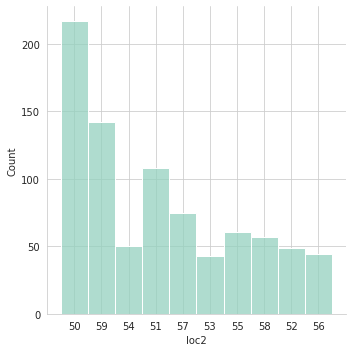

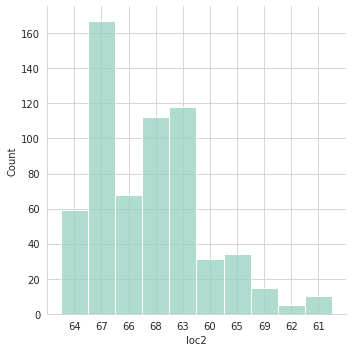

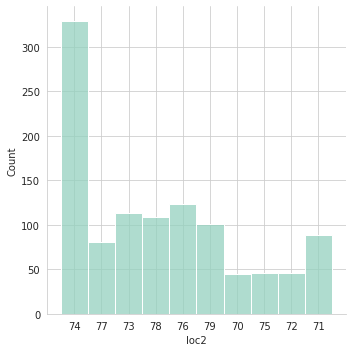

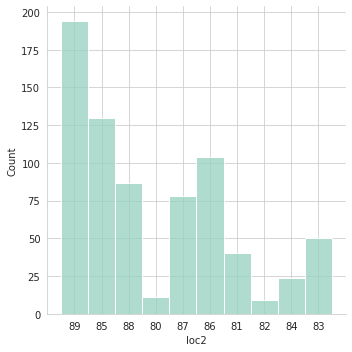

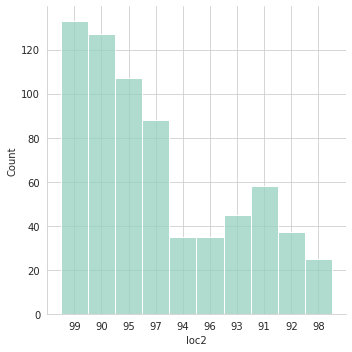

In [26]:
loc_0 = price_ds_2[price_ds_2['loc1']=='0']
loc_1 = price_ds_2[price_ds_2['loc1']=='1']
loc_2 = price_ds_2[price_ds_2['loc1']=='2']
loc_3 = price_ds_2[price_ds_2['loc1']=='3']
loc_4 = price_ds_2[price_ds_2['loc1']=='4']
loc_5 = price_ds_2[price_ds_2['loc1']=='5']
loc_6 = price_ds_2[price_ds_2['loc1']=='6']
loc_7 = price_ds_2[price_ds_2['loc1']=='7']
loc_8 = price_ds_2[price_ds_2['loc1']=='8']
loc_9 = price_ds_2[price_ds_2['loc1']=='9']

sns.displot(loc_0['loc2'])
sns.displot(loc_1['loc2'])
sns.displot(loc_2['loc2'])
sns.displot(loc_3['loc2'])
sns.displot(loc_4['loc2'])
sns.displot(loc_5['loc2'])
sns.displot(loc_6['loc2'])
sns.displot(loc_7['loc2'])
sns.displot(loc_8['loc2'])
sns.displot(loc_9['loc2'])

Most seem to have pretty good coverage actually, usually over 50. Lets keep it and use it to train the model. We will compare results with and without this parameter and see how well we can train it, watching out for overfitting. 

Now lets look at dow

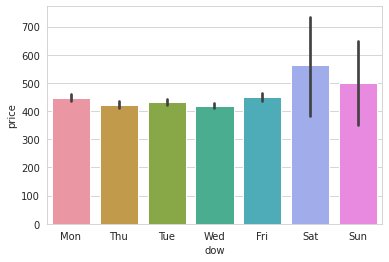

In [27]:
sns.barplot(x="dow", y="price", data=price_ds_2)

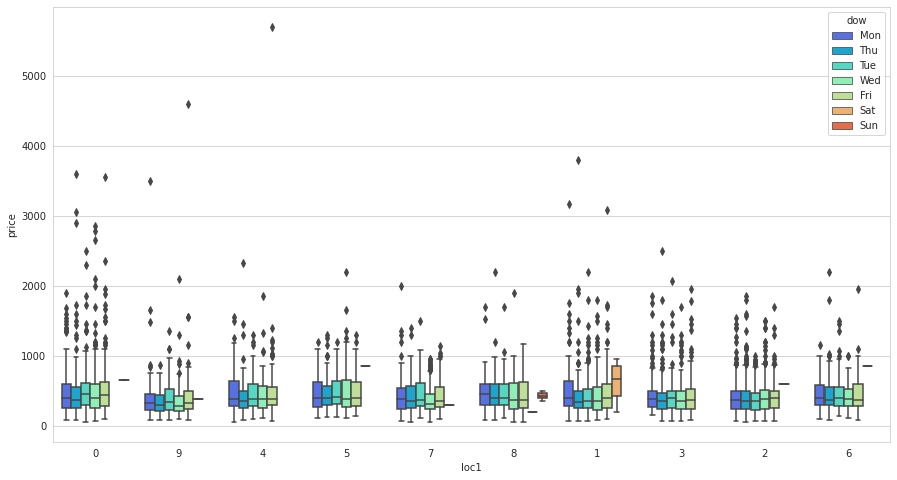

In [28]:
plt.figure(figsize = (15,8))
sns.boxplot(data=price_ds_2,x='loc1',y='price',hue=price_ds_2['dow'],palette='rainbow')

In [29]:
price_ds_2['dow'].value_counts()

Wed    2233
Tue    1997
Fri    1929
Mon    1917
Thu    1908
Sat      10
Sun       3
Name: dow, dtype: int64

It appears that day of week doesnt seem to impact the price too much, except for sat and sun. These days have a higher average but a much higher range. There are only 13 total so we could exclude them as well if we want.

Also breaking it down by location we dont see many crazy swings. Location 1 is the only exception. dow seems to effect the price pretty decently in location 1. This will come in handy later as we explore models. Maybe a simple regression will work or maybe the model will branch nicely off of this parameter. 

So many questions... and starting to get some answers. This is getting fun.

# Linear Regression Modeling

Time to test out a few models with the new parameters.

We are trying to predict price, so we want an actual numerical output, which would imply a regression model. To improve the regression model we could also play with clustering the data into groups, or using PCA to narrow down our variables first.

Lets start with a simple Linear Regression model. Then we will use Random Forest Regression.

For a regression model we can only use numerical inputs. This excludes the categorical variables loc1, loc2 and dow. We saw that location doesnt have a *huge* swing in the price but it might be worthwhile to test it out. We could convert to a simple number or we could dummy encode. I would lean toward just using the number for loc1 as it is already a number. dow mostly shows a change based on the weekend. We could create a dummy variable for work days or weekends that might work fine or we could encode the weeks to a number. I will encode and keep the variability. loc 2 will be handled separately later on.

In [30]:
price_ds_2['loc1_int']=price_ds_2['loc1'].astype(str).astype(int)

In [31]:
price_ds_2['dow'].value_counts()

Wed    2233
Tue    1997
Fri    1929
Mon    1917
Thu    1908
Sat      10
Sun       3
Name: dow, dtype: int64

In [32]:
def dow_conv(day):
    if day=="Mon":
        return 1
    elif day=="Tue":
        return 2
    elif day=="Wed":
        return 3
    elif day=="Thu":
        return 4
    elif day=="Fri":
        return 5
    elif day=="Sat":
        return 6
    elif day=="Sun":
        return 7
    
price_ds_2['dow_int']=price_ds_2['dow'].apply(lambda x: dow_conv(x))

In [33]:
price_ds_2['dow_int'].value_counts()

3    2233
2    1997
5    1929
1    1917
4    1908
6      10
7       3
Name: dow_int, dtype: int64

In [34]:
price_ds_2.columns

Index(['loc1', 'loc2', 'para1', 'dow', 'para2', 'para3', 'para4', 'price',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/1', 'para2/3', 'para2/4',
       'para3/1', 'para3/2', 'para3/4', 'para4/1', 'para4/2', 'para4/3',
       'loc1_int', 'dow_int'],
      dtype='object')

Now for the good part... lets try some Linear Regression models.

In [35]:
y = price_ds_2['price']
X = price_ds_2[['para1', 'para2', 'para3', 'para4', 
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/3', 'para2/4', 'para3/4',
       'para3/2', 'para4/2', 'para4/3',
       'loc1_int', 'dow_int']]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
lm = LinearRegression()

lm.fit(X_train,y_train)

print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-8.16486164e+01 -5.40450460e-02  5.79724743e-03  5.61282092e+00
  1.10919165e-01 -2.30805324e-05  3.50196323e+00  4.24488158e-06
  5.82416395e-02 -6.40712652e-04  3.47359218e+03  1.08643548e+03
  2.76309630e+01  3.99342851e+01  1.55676276e-01 -3.29242770e-03
 -3.95452093e-02  3.14198362e+02 -5.54474693e+03 -8.33635037e-01
 -2.38690860e+00]


Text(0, 0.5, 'Predicted Y')

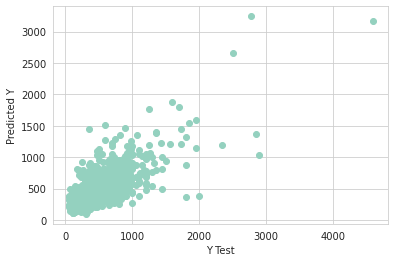

In [39]:
predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 99.28535266971471
MSE: 25565.048779132616
RMSE: 159.89074012941654


**A note on my cost functions**

For this project I am using the 3 cost functions above (MAE, MSE, and RMSE). 

Though all 3 are looked at and tend to follow each other, I am emphasizing MAE as my primary cost function. This is because I am mostly aiming to get as close to the 'price' as possible, while placing less emphasis on outliers. There are some outliers in the data that I have removed, but the majority of the data tends to fall fairly close to each other and is skewed to the left. I do not want to weight those outliers as heavily and think that MAE is a simple, straight forward function to aim for. Again, most of the time in this analysis these 3 follow each other, but I am specifically aiming for MAE.

In [2]:
sns.distplot((y_test-predictions),bins=50);

NameError: ignored

We got a model with results indicating that the avg absolute error is 99. Its hard to know whether this is good or not yet, and to help give context we should compare to the actual prices.

In [42]:
price_ds_2['price'].mean()

433.6191417425229

Average of 433. So I feel like our error of 99 could improve. With generic data and no domain knowledge this *might* be an ok starting point, but lets see if we can improve our model to get a better price.

Thoughts to improve:\
test out dropping some of the weaker variables\
drop dow\
Split loc 1 and loc 2 first\
test if we improved the model by adding the new variables (compared to the original model)\
create some PCA vairables that might explain the data more and be a useful parameter\
create some clusters and see if they would improve the model to use as a parameter.

First thing to look at is how would the model look just using the original parameters?

Text(0, 0.5, 'Predicted Y')

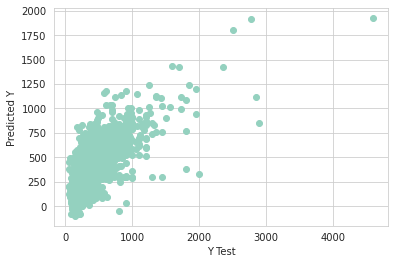

In [43]:
y = price_ds_2['price']
X = price_ds_2[['para1', 'para2', 'para3', 'para4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 113.81644449514008
MSE: 31332.605078807832
RMSE: 177.01018354548935


It appears we did improve the model by using the added features from before (by about 13% already). This is good news! #Winning 

Lets test out if dropping location or dow helps.

Text(0, 0.5, 'Predicted Y')

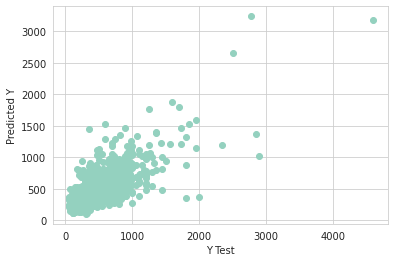

In [45]:
y = price_ds_2['price']
X = price_ds_2[['para1', 'para2', 'para3', 'para4', 
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/3', 'para2/4', 'para3/4',
       'para3/2', 'para4/2', 'para4/3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 99.33839080237547
MSE: 25597.09924356463
RMSE: 159.99093487933817


It appears this had a marginally worse performance. #NotWinning\
Lets test against the top parameters from before in the corr matrix.

Text(0, 0.5, 'Predicted Y')

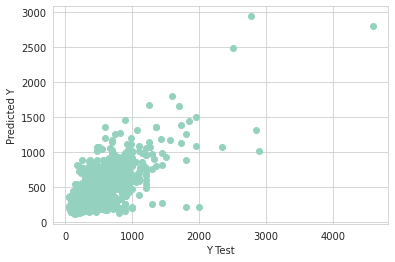

In [47]:
y = price_ds_2['price']
X = price_ds_2[['para2x4', 'para2', 'para2x3', 'para4', 
       'para1x2', 'para1x4', 'para3x4','loc1_int','dow_int']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 103.25755399557275
MSE: 28287.1113400405
RMSE: 168.18772648454615


Dropping features here obviously didnt help. Lets see if we can add new features that will help. 

Options include:\
clustering\
pca

First lets check to see if using dummies for all values (rather than just encoding) works better. 

In [49]:
price_ds_dummies = pd.get_dummies(price_ds_2)

price_ds_dummies.head()

,para1,para2,para3,para4,price,para1x2,para1x3,para1x4,para2x3,para2x4,...,loc2_97,loc2_98,loc2_99,dow_Fri,dow_Mon,dow_Sat,dow_Sun,dow_Thu,dow_Tue,dow_Wed
0,1,662,3000.0,3.8,73.49,662,3000.0,3.8,1986000.0,2515.6,...,0,0,0,0,1,0,0,0,0,0
1,1,340,2760.0,9.2,300.00,340,2760.0,9.2,938400.0,3128.0,...,0,0,1,0,0,0,0,1,0,0
2,0,16,2700.0,3.0,130.00,0,0.0,0.0,43200.0,48.0,...,0,0,0,0,1,0,0,0,0,0
3,1,17,12320.0,6.4,365.00,17,12320.0,6.4,209440.0,108.8,...,0,0,0,0,1,0,0,0,0,0
4,1,610,2117.0,10.8,357.50,610,2117.0,10.8,1291370.0,6588.0,...,0,0,0,0,0,0,0,1,0,0


Text(0, 0.5, 'Predicted Y')

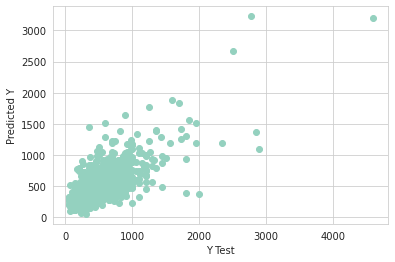

In [50]:
y = price_ds_dummies['price']
X = price_ds_dummies.drop(['price','para2/1','para3/1','para4/1'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 99.73918096038342
MSE: 25463.157974862108
RMSE: 159.57179567474356


Nope. Didnt. Oh well. Were charging forward! 

# PCA

On to PCA. Im excited and optimistic that this will help!

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
price_ds_ints = price_ds_2[['para1', 'para2', 'para3', 'para4', 
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para2/3', 'para2/4', 'para3/4',
       'para3/2', 'para4/2', 'para4/3']]
scaler.fit(price_ds_ints)

scaled_data = scaler.transform(price_ds_ints)

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [54]:
scaled_data.shape

(9997, 18)

In [55]:
x_pca.shape

(9997, 3)

Text(0, 0.5, 'Second Principal Component')

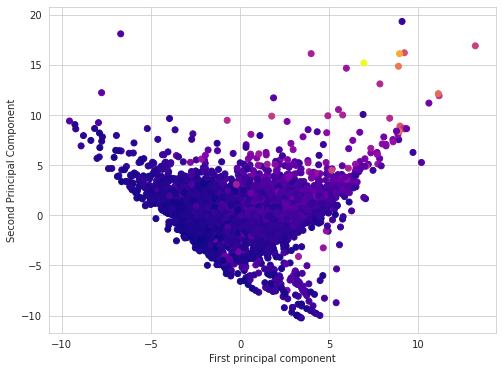

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=price_ds_2['price'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [57]:
print(pca.explained_variance_ratio_)

[0.32069925 0.20489319 0.13849081]


So our 3 PCA variables explain roughly 66% of the data. Not too shabby. Lets hope using them in the model can help improve it!

In [58]:
columns = ['pca_%i' % i for i in range(3)]
df_pca = pd.DataFrame(x_pca, columns=columns, index=price_ds_2.index)
df_pca.head()

,pca_0,pca_1,pca_2
0,-1.951681,0.601150,-0.895096
1,-1.427975,-0.547220,0.129146
2,-1.839283,-3.499663,0.407636
3,0.801343,-5.950736,5.816185
4,-1.292082,0.808067,0.086454


In [59]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca_0   9997 non-null   float64
 1   pca_1   9997 non-null   float64
 2   pca_2   9997 non-null   float64
dtypes: float64(3)
memory usage: 570.4 KB


In [60]:
df_pca=df_pca.join(price_ds_2['price'])

In [61]:
df_pca.head()

,pca_0,pca_1,pca_2,price
0,-1.951681,0.601150,-0.895096,73.49
1,-1.427975,-0.547220,0.129146,300.00
2,-1.839283,-3.499663,0.407636,130.00
3,0.801343,-5.950736,5.816185,365.00
4,-1.292082,0.808067,0.086454,357.50


Text(0, 0.5, 'Predicted Y')

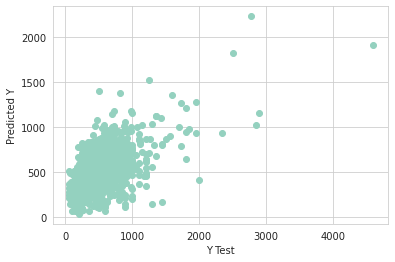

In [62]:
y = df_pca['price']
X = df_pca.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 134.0572601983227
MSE: 39944.62633768075
RMSE: 199.8615179009725


Well thats unfortunate. We only used 3 which explained 66% of data, though, so we have room for improvement. Lets use them with the original data as well.

In [64]:
price_ds_pca=price_ds_2.join(df_pca[['pca_0','pca_1','pca_2']])

In [65]:
price_ds_pca.head()

,loc1,loc2,para1,dow,para2,para3,para4,price,para1x2,para1x3,...,para3/2,para3/4,para4/1,para4/2,para4/3,loc1_int,dow_int,pca_0,pca_1,pca_2
0,0,01,1,Mon,662,3000.0,3.8,73.49,662,3000.0,...,4.531722,789.473684,3.8,0.005740,0.001267,0,1,-1.951681,0.601150,-0.895096
1,9,99,1,Thu,340,2760.0,9.2,300.00,340,2760.0,...,8.117647,300.000000,9.2,0.027059,0.003333,9,4,-1.427975,-0.547220,0.129146
2,0,04,0,Mon,16,2700.0,3.0,130.00,0,0.0,...,168.750000,900.000000,inf,0.187500,0.001111,0,1,-1.839283,-3.499663,0.407636
3,4,40,1,Mon,17,12320.0,6.4,365.00,17,12320.0,...,724.705882,1925.000000,6.4,0.376471,0.000519,4,1,0.801343,-5.950736,5.816185
4,5,50,1,Thu,610,2117.0,10.8,357.50,610,2117.0,...,3.470492,196.018519,10.8,0.017705,0.005102,5,4,-1.292082,0.808067,0.086454


In [66]:
price_ds_pca.columns

Index(['loc1', 'loc2', 'para1', 'dow', 'para2', 'para3', 'para4', 'price',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/1', 'para2/3', 'para2/4',
       'para3/1', 'para3/2', 'para3/4', 'para4/1', 'para4/2', 'para4/3',
       'loc1_int', 'dow_int', 'pca_0', 'pca_1', 'pca_2'],
      dtype='object')

In [67]:
price_ds_pca=price_ds_pca[price_ds_pca['loc1']!="S"]
price_ds_pca=price_ds_pca[price_ds_pca['loc1']!="T"]
price_ds_pca['loc1_int']=price_ds_pca['loc1'].astype(str).astype(int)
price_ds_pca['dow_int']=price_ds_pca['dow'].apply(lambda x: dow_conv(x))

price_ds_pca.columns

Index(['loc1', 'loc2', 'para1', 'dow', 'para2', 'para3', 'para4', 'price',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/1', 'para2/3', 'para2/4',
       'para3/1', 'para3/2', 'para3/4', 'para4/1', 'para4/2', 'para4/3',
       'loc1_int', 'dow_int', 'pca_0', 'pca_1', 'pca_2'],
      dtype='object')

Text(0, 0.5, 'Predicted Y')

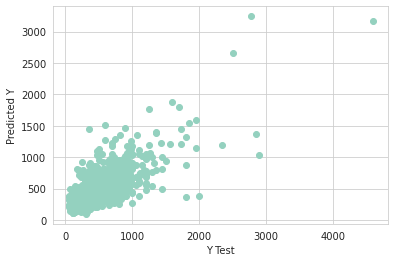

In [68]:
y = price_ds_pca['price']
X = price_ds_pca[['para1', 'para2', 'para3', 'para4',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/3', 'para2/4',
       'para3/2', 'para3/4', 'para4/2', 'para4/3',
       'pca_0', 'pca_1', 'pca_2', 'loc1_int', 'dow_int']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 99.28535266971443
MSE: 25565.048779135228
RMSE: 159.89074012942473


Aaaaannnddd still the same. 

After all of this trial with PCA it appears that the model is not able to run any better using the new PCA generated columns. 

Disappointing but its not killing my optimism! Lets try adding in some clusters.

First lets see how many clusters we should aim for using the elbow method.

# Clustering and LinReg 2.0

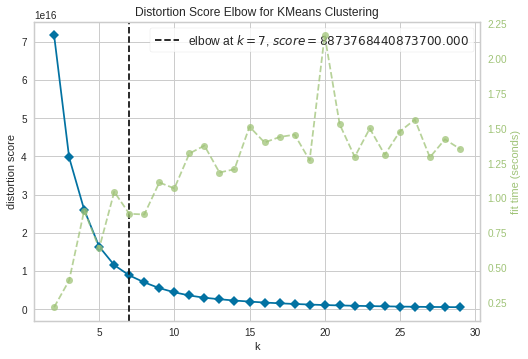

In [70]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(price_ds_pca.drop(['loc1','loc2','dow','para2/1','para3/1','para4/1'],axis=1))
visualizer.show()

After checking the elbow method for the optimal number of clusters, it was determined to be 7. Now to create these clusters

In [71]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(price_ds_pca.drop(['loc1','loc2','dow','para2/1','para3/1','para4/1'],axis=1))

KMeans(n_clusters=7)

In [72]:
predict=kmeans.predict(price_ds_pca.drop(['loc1','loc2','dow','para2/1','para3/1','para4/1'],axis=1))

price_ds_2['kmc'] = pd.Series(predict, index=price_ds_2.index)
price_ds_2.columns

Index(['loc1', 'loc2', 'para1', 'dow', 'para2', 'para3', 'para4', 'price',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/1', 'para2/3', 'para2/4',
       'para3/1', 'para3/2', 'para3/4', 'para4/1', 'para4/2', 'para4/3',
       'loc1_int', 'dow_int', 'kmc'],
      dtype='object')

Now that we have the df with new clusters assigned, lets rerun the model and see if it is any better. *Crosses Fingers*

Text(0, 0.5, 'Predicted Y')

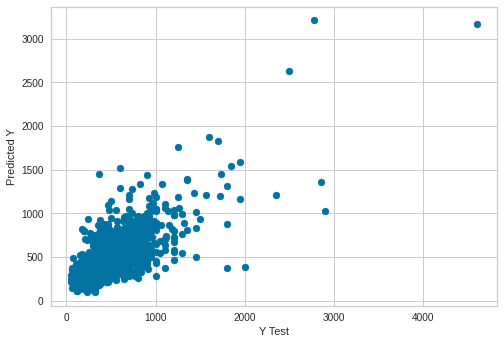

In [73]:
y = price_ds_2['price']
X = price_ds_2[['para1', 'para2', 'para3', 'para4',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/3', 'para2/4',
       'para3/2', 'para3/4', 'para4/2', 'para4/3', 'loc1_int', 'dow_int','kmc']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 99.11826605815716
MSE: 25496.596832481286
RMSE: 159.6765381403332


Not any improvement on the model. (marginal if we want to get technical).

One thing I havent considered is the loc2 variable. It seemed much finer resolution so maybe there is a way to use it in the model to tune things further. All the loc2 variables are a single number except it also contains "0B" , "0C", "0T", "0L", and "0N". From the earlier histograms, I notice that these variables dont have very many rows so we can drop them and just use the numbers in loc2.

In [75]:
price_ds_3 = price_ds_2

price_ds_3 = price_ds_3[price_ds_3['loc2']!="0B"]
price_ds_3 = price_ds_3[price_ds_3['loc2']!="0C"]
price_ds_3 = price_ds_3[price_ds_3['loc2']!="0T"]
price_ds_3 = price_ds_3[price_ds_3['loc2']!="0L"]
price_ds_3 = price_ds_3[price_ds_3['loc2']!="0N"]

price_ds_3['loc2'].value_counts()

21    499
06    454
74    329
12    273
14    246
     ... 
82      9
62      5
11      2
00      1
43      1
Name: loc2, Length: 100, dtype: int64

I also want to create a concatenated column using loc1 and loc2 to get as specific of a location as I can.

In [76]:
price_ds_3['loc3']=price_ds_3['loc1']+price_ds_3['loc2']

price_ds_3['loc3'].value_counts()

221    499
006    454
774    329
112    273
114    246
      ... 
882      9
662      5
111      2
000      1
443      1
Name: loc3, Length: 100, dtype: int64

In [77]:
price_ds_3['loc1'].value_counts()

2    1607
0    1481
1    1223
7    1081
3     945
5     846
4     773
8     727
9     690
6     619
Name: loc1, dtype: int64

In [78]:
price_ds_3['loc2_int']=price_ds_3['loc2'].astype(str).astype(int)
price_ds_3['loc3_int']=price_ds_3['loc3'].astype(str).astype(int)

price_ds_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loc1      9992 non-null   object 
 1   loc2      9992 non-null   object 
 2   para1     9992 non-null   int64  
 3   dow       9992 non-null   object 
 4   para2     9992 non-null   int64  
 5   para3     9992 non-null   float64
 6   para4     9992 non-null   float64
 7   price     9992 non-null   float64
 8   para1x2   9992 non-null   int64  
 9   para1x3   9992 non-null   float64
 10  para1x4   9992 non-null   float64
 11  para2x3   9992 non-null   float64
 12  para2x4   9992 non-null   float64
 13  para3x4   9992 non-null   float64
 14  para1/2   9992 non-null   float64
 15  para1/3   9992 non-null   float64
 16  para1/4   9992 non-null   float64
 17  para2/1   9992 non-null   float64
 18  para2/3   9992 non-null   float64
 19  para2/4   9992 non-null   float64
 20  para3/1   9992 non-null   floa

Im curious to know how correlated loc2 and loc3 are to the price now.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


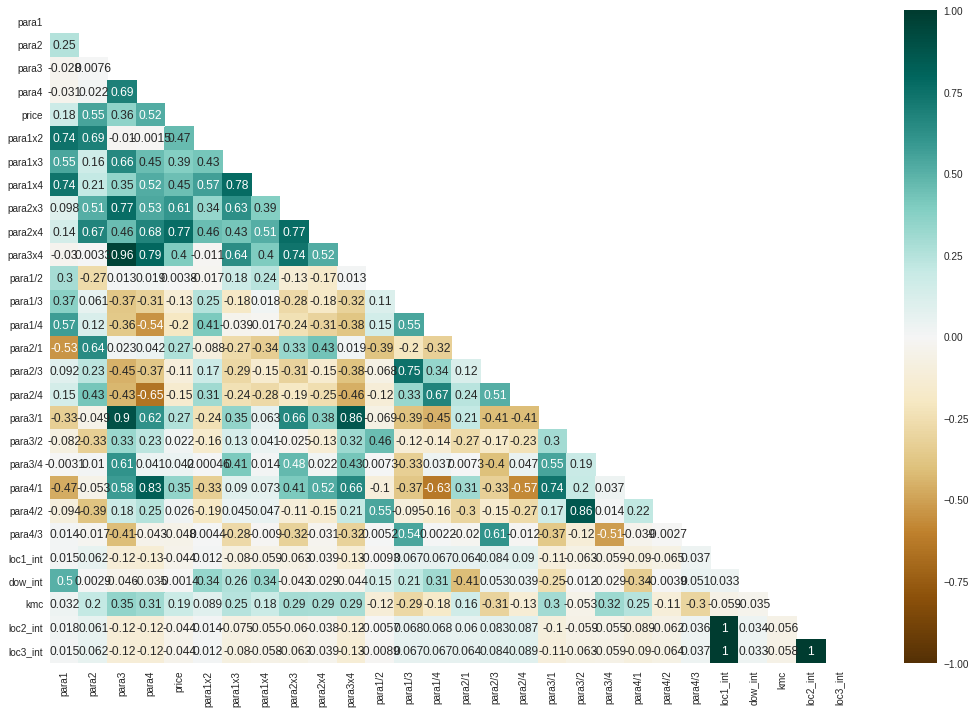

In [79]:
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(price_ds_3.corr(), dtype=np.bool))
heatmap = sns.heatmap(price_ds_3.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

Not a great correlation but lets retry running the model with the new loc2 and loc3 and see how it looks.

Text(0, 0.5, 'Predicted Y')

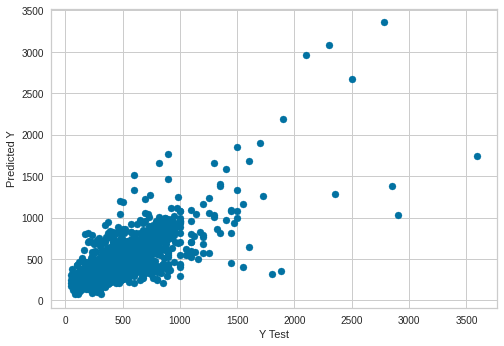

In [80]:
y = price_ds_3['price']
X = price_ds_3[['para1', 'para2', 'para3', 'para4',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/3', 'para2/4',
       'para3/2', 'para3/4', 'para4/2', 'para4/3', 'loc1_int', 'dow_int','kmc','loc2_int','loc3_int']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 100.35624662376084
MSE: 26582.28447473771
RMSE: 163.04074483005073


Slightly worse results. Not surprising as the values were not very correlated. 

Another thing I wonder now is how would a model fare within a set loc1? As they say, "Location, location, location"

Could a model be made within loc1 and use that to get better accuracy. Lets test with loc1 and loc 4.

In [82]:
price_ds_loc1 = price_ds_3[price_ds_3['loc1']=="1"]
price_ds_loc4 = price_ds_3[price_ds_3['loc1']=="4"]

In [83]:
price_ds_loc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 9 to 9988
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loc1      1223 non-null   object 
 1   loc2      1223 non-null   object 
 2   para1     1223 non-null   int64  
 3   dow       1223 non-null   object 
 4   para2     1223 non-null   int64  
 5   para3     1223 non-null   float64
 6   para4     1223 non-null   float64
 7   price     1223 non-null   float64
 8   para1x2   1223 non-null   int64  
 9   para1x3   1223 non-null   float64
 10  para1x4   1223 non-null   float64
 11  para2x3   1223 non-null   float64
 12  para2x4   1223 non-null   float64
 13  para3x4   1223 non-null   float64
 14  para1/2   1223 non-null   float64
 15  para1/3   1223 non-null   float64
 16  para1/4   1223 non-null   float64
 17  para2/1   1223 non-null   float64
 18  para2/3   1223 non-null   float64
 19  para2/4   1223 non-null   float64
 20  para3/1   1223 non-null   floa

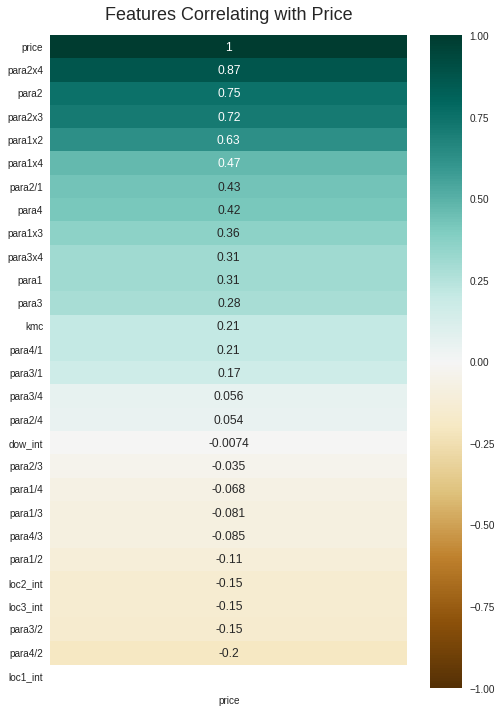

In [84]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(price_ds_loc1.corr()[['price']].sort_values(by='price', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

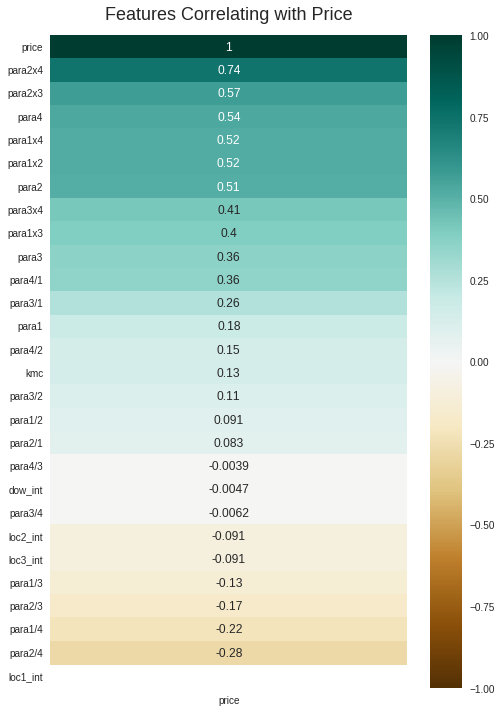

In [85]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(price_ds_loc4.corr()[['price']].sort_values(by='price', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

Text(0, 0.5, 'Predicted Y')

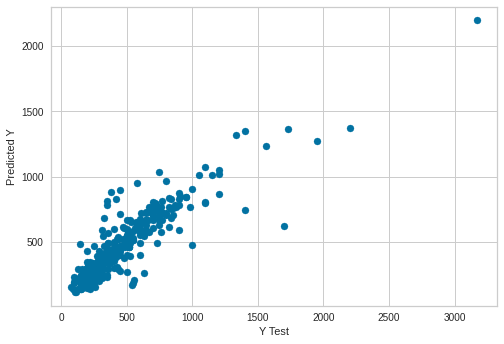

In [86]:
y = price_ds_loc1['price']
X = price_ds_loc1[['para1', 'para2', 'para3', 'para4',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/3', 'para2/4',
       'para3/2', 'para3/4', 'para4/2', 'para4/3', 'loc1_int', 'dow_int','kmc','loc2_int','loc3_int']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 88.54732551719096
MSE: 23888.091252953083
RMSE: 154.55772789787343


Boom, best yet! But it only works within loc 1 so we would need it to apply to everything. But promising results. 

Text(0, 0.5, 'Predicted Y')

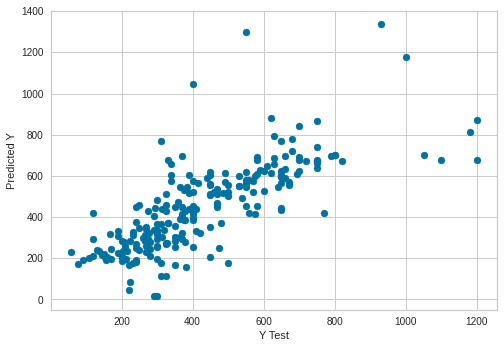

In [88]:
y = price_ds_loc4['price']
X = price_ds_loc4[['para1', 'para2', 'para3', 'para4',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/3', 'para2/4',
       'para3/2', 'para3/4', 'para4/2', 'para4/3', 'loc1_int', 'dow_int','kmc','loc2_int','loc3_int']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 102.52696821422552
MSE: 21935.136611553673
RMSE: 148.1051538993619


# Random Forest Regression

It appears from above that we might be able to get a better model by first splitting the data into subgroups like loc1. This would lend itself nicely to a Random Forest methodology. Now that I have thoroughly analyzed linear regression, lets try Random Forest Regression and see if it can improve. 

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

y = price_ds_3['price']
X = price_ds_3[['para1', 'para2', 'para3', 'para4',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/3', 'para2/4',
       'para3/2', 'para3/4', 'para4/2', 'para4/3', 'loc1_int', 'dow_int','kmc','loc2_int','loc3_int']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr.fit(X_train, y_train)

predictions = rfr.predict(X_test)

r2_score(y_test,predictions)

0.6233320744970872

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 93.95174678423712
MSE: 26022.95100119695
RMSE: 161.3163073008955


Great! We got a better MAE than ever before. This is a good step in the right direction. Lets try with more estimators. 

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

y = price_ds_3['price']
X = price_ds_3[['para1', 'para2', 'para3', 'para4',
       'para1x2', 'para1x3', 'para1x4', 'para2x3', 'para2x4', 'para3x4',
       'para1/2', 'para1/3', 'para1/4', 'para2/3', 'para2/4',
       'para3/2', 'para3/4', 'para4/2', 'para4/3', 'loc1_int', 'dow_int','kmc','loc2_int','loc3_int']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfr = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rfr.fit(X_train, y_train)

predictions = rfr.predict(X_test)

r2_score(y_test,predictions)

0.6245106169921879

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 93.90931997453629
MSE: 25941.528741624712
RMSE: 161.06374123813438


Didnt help by itself which is alright, good to know. 

Next step is to attempt to optimize the RF Model. 

I will do this by doing a search through various parameters and see which ones produce the best results. Then re-run the model with the best parameters. GridSearchCV lets me test lots of parameters at once, so lets use that.

In [ ]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500, 1000]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.0min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [94]:
rfr_opt = RandomForestRegressor(bootstrap = True, max_depth = 100, max_features = 3,
                                min_samples_leaf=3, min_samples_split=8,
                                n_estimators = 200, random_state = 0)
rfr_opt.fit(X_train, y_train)

predictions_opt = rfr_opt.predict(X_test)

r2_score(y_test,predictions_opt)

0.6818146698405188

In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_opt))
print('MSE:', metrics.mean_squared_error(y_test, predictions_opt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_opt)))

MAE: 89.77835060394328
MSE: 21982.54933701762
RMSE: 148.26513189896545


Well, well, well... This is the best model yet! Its another 10% improvements over the best weve had so far. #Gainz 

This appears to be about as good as we are going to get it using these paramters and this particular model. 

Now lets try 1 more thing, ANN.

# ANN

In [98]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler



In [112]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(Dense(96,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(48,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(24,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mean_absolute_error'])

early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, 
          y=y_train.values, 
          epochs=200,
          batch_size=20,
          validation_data=(X_test, y_test), verbose=1)


Epoch 1/200
350/350 [==============================] - 4s 7ms/step - loss: 225.3853 - mean_absolute_error: 225.3853 - val_loss: 143.7144 - val_mean_absolute_error: 143.7144
Epoch 2/200
350/350 [==============================] - 2s 6ms/step - loss: 161.8494 - mean_absolute_error: 161.8494 - val_loss: 105.6029 - val_mean_absolute_error: 105.6029
Epoch 3/200
350/350 [==============================] - 2s 6ms/step - loss: 152.3301 - mean_absolute_error: 152.3301 - val_loss: 108.5025 - val_mean_absolute_error: 108.5025
Epoch 4/200
350/350 [==============================] - 1s 3ms/step - loss: 149.8698 - mean_absolute_error: 149.8698 - val_loss: 103.2373 - val_mean_absolute_error: 103.2373
Epoch 5/200
350/350 [==============================] - 1s 4ms/step - loss: 149.4215 - mean_absolute_error: 149.4215 - val_loss: 125.6681 - val_mean_absolute_error: 125.6681
Epoch 6/200
350/350 [==============================] - 1s 3ms/step - loss: 149.8699 - mean_absolute_error: 149.8699 - val_loss: 101.185

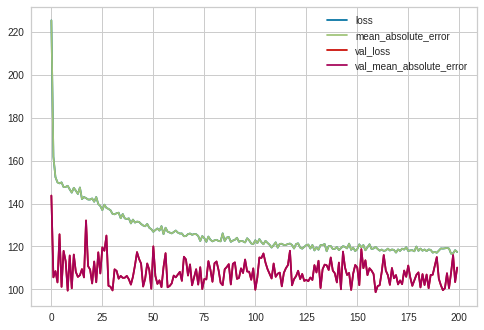

In [113]:
losses = pd.DataFrame(model.history.history)
losses.plot()


Text(0, 0.5, 'Predicted Y')

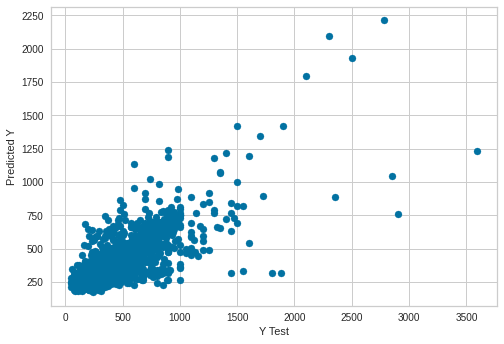

In [114]:

predictions = model.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [115]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 110.14805709034701
MSE: 31189.351041647962
RMSE: 176.60507082654212


Surprisingly, not better but worse. ANN isnt always the best option (which is hard for some people to say) but maybe we can improve on the base model and get a better result. 

Like with the RFR lets test out multiple parameters to see which one it suggests.

This is going to take a while to run, why dont you go get a coffee or take lunch break and come back. Ill be here.

In [117]:
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
def build_clf(unit):

  ann = tf.keras.models.Sequential()
  
  ann.add(tf.keras.layers.Dense(units=unit, activation='linear'))
  ann.add(Dropout(0.2))
  ann.add(tf.keras.layers.Dense(units=unit, activation='linear'))
  ann.add(Dropout(0.2))
  ann.add(tf.keras.layers.Dense(units=unit, activation='linear'))
  ann.add(Dropout(0.2))
  ann.add(tf.keras.layers.Dense(units=unit, activation='linear'))
  ann.add(Dropout(0.2))
  ann.add(tf.keras.layers.Dense(units=unit, activation='linear'))
  ann.add(Dropout(0.2))
  ann.add(tf.keras.layers.Dense(units=unit, activation='linear'))
  ann.add(Dropout(0.2))
  ann.add(Dense(1))
  ann.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['accuracy'])
  return ann

model=KerasClassifier(build_fn=build_clf)

params={'batch_size':[10,20,30,40,50,75,100], 
        'nb_epoch':[2000,1000,500,400,200],
        'unit':[2,4,8,10,20,40],
        }
gs=GridSearchCV(estimator=model, param_grid=params, cv=10)

gs = gs.fit(X=X_train, y=y_train.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


7/7 [==============================] - 0s 3ms/step - loss: 347.6097 - accuracy: 0.0000e+00


In [ ]:
best_params=gs.best_params_
accuracy=gs.best_score_

In [123]:
print(best_params)

{'batch_size': 10, 'nb_epoch': 2000, 'unit': 2}


Ok we got some parameters so lets run it with these. 

In [124]:
model = Sequential()

model.add(Dense(2,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, 
          y=y_train.values, 
          epochs=2000,
          batch_size=10,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/2000
700/700 [==============================] - 6s 6ms/step - loss: 353.5301 - accuracy: 0.0000e+00 - val_loss: 240.9131 - val_accuracy: 0.0000e+00
Epoch 2/2000
700/700 [==============================] - 5s 7ms/step - loss: 301.2466 - accuracy: 0.0000e+00 - val_loss: 217.6220 - val_accuracy: 0.0000e+00
Epoch 3/2000
700/700 [==============================] - 3s 5ms/step - loss: 284.1274 - accuracy: 0.0000e+00 - val_loss: 201.1506 - val_accuracy: 0.0000e+00
Epoch 4/2000
700/700 [==============================] - 4s 5ms/step - loss: 269.0588 - accuracy: 0.0000e+00 - val_loss: 187.7512 - val_accuracy: 0.0000e+00
Epoch 5/2000
700/700 [==============================] - 4s 6ms/step - loss: 259.5413 - accuracy: 0.0000e+00 - val_loss: 182.9254 - val_accuracy: 0.0000e+00
Epoch 6/2000
700/700 [==============================] - 5s 7ms/step - loss: 250.2347 - accuracy: 0.0000e+00 - val_loss: 171.5178 - val_accuracy: 0.0000e+00
Epoch 7/2000
700/700 [==============================] - 3s 4ms/s

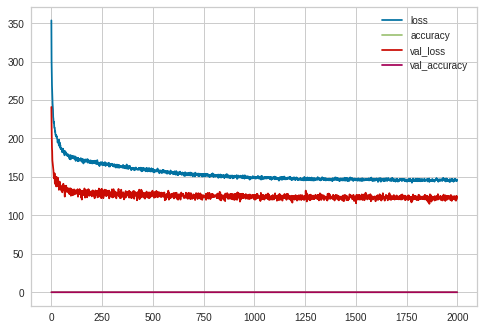

In [125]:
losses = pd.DataFrame(model.history.history)
losses.plot()


Well that didnt help either. Good to know. 

It appears that 2000 is too many as the loss isnt reduced after ~750 epochs. I also suspect that 2 units isnt enough and will run 1 more with a higher value.

In [126]:
model = Sequential()

model.add(Dense(24,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(48,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(48,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(48,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(24,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, 
          y=y_train.values, 
          epochs=750,
          batch_size=10,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/750
700/700 [==============================] - 5s 5ms/step - loss: 175.2821 - accuracy: 0.0000e+00 - val_loss: 119.7318 - val_accuracy: 0.0000e+00
Epoch 2/750
700/700 [==============================] - 3s 4ms/step - loss: 142.5880 - accuracy: 0.0000e+00 - val_loss: 104.5948 - val_accuracy: 0.0000e+00
Epoch 3/750
700/700 [==============================] - 3s 5ms/step - loss: 136.7553 - accuracy: 0.0000e+00 - val_loss: 106.3510 - val_accuracy: 0.0000e+00
Epoch 4/750
700/700 [==============================] - 3s 4ms/step - loss: 136.0997 - accuracy: 0.0000e+00 - val_loss: 111.3174 - val_accuracy: 0.0000e+00
Epoch 5/750
700/700 [==============================] - 4s 5ms/step - loss: 133.1357 - accuracy: 0.0000e+00 - val_loss: 101.7494 - val_accuracy: 0.0000e+00
Epoch 6/750
700/700 [==============================] - 3s 4ms/step - loss: 130.3955 - accuracy: 0.0000e+00 - val_loss: 111.9036 - val_accuracy: 0.0000e+00
Epoch 7/750
700/700 [==============================] - 3s 4ms/step - l

Text(0, 0.5, 'Predicted Y')

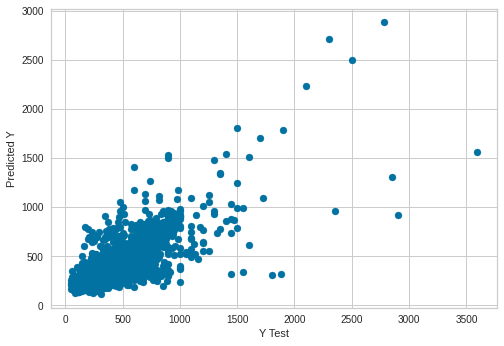

In [127]:
predictions = model.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [128]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 97.79037708865235
MSE: 27224.00584909677
RMSE: 164.99698739400296


It appears that none of the ANN's have been able to improve the model performance over the RFR model from before. This makes some sense as we saw that splitting the data based on location had a large impact earlier, lending itself to a Random Forest methodology. It was still good to go through the exercise of testing out ANN's. 

# Summary and Recommendation

Based upon the best models that I have been able to get I have the following results:

**Linear Regression:** \
*Base model with only using original parameters*\
MAE: 113.81644449514008\
MSE: 31332.605078807832\
RMSE: 177.01018354548935\

*Best achieved model (using k-means clustering)*\
MAE: 99.11826605815716\
MSE: 25496.596832481286\
RMSE: 159.6765381403332\

**Random Forest Regression**\
*Base Model*\
MAE: 93.95174678423712\
MSE: 26022.95100119695\
RMSE: 161.3163073008955\

*Optimized Model*\
MAE: 89.77835060394328\
MSE: 21982.54933701762\
RMSE: 148.26513189896545\

**ANN**\
*Best Model*\
MAE: 97.79037708865235
MSE: 27224.00584909677
RMSE: 164.99698739400296


**Based upon this data I would recommend the RFR Optimized model which used the following:**\
'bootstrap': True,\
'max_depth': 100,\
'max_features': 3,\
'min_samples_leaf': 3,\
'min_samples_split': 8,\
'n_estimators': 200